In [52]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
height=[185,170,168,179,182,188,180,180,183,180,180,177]
weight=[72,56,60,68,72,77,71,70,84,88,67,76]
age=[52,36,60,68,42,55,21,70,24,68,32,58]
data=pd.DataFrame({'height':height,'weight':weight,'age':age})

In [54]:
data

,height,weight,age
0,185,72,52
1,170,56,36
2,168,60,60
3,179,68,68
4,182,72,42
5,188,77,55
6,180,71,21
7,180,70,70
8,183,84,24
9,180,88,68


In [55]:
def center_selection(data):
    centers_no=int(input("Enter no. of centers: "))
    features_name=list(data.head(0))
    centers=[]
    for i in range(centers_no):
        centers.append(list(data.iloc[i,:]))
    return centers_no,features_name,centers
centers_no,features_name,centers=center_selection(data)

Enter no. of centers: 3


In [56]:
centers

[[185, 72, 52], [170, 56, 36], [168, 60, 60]]

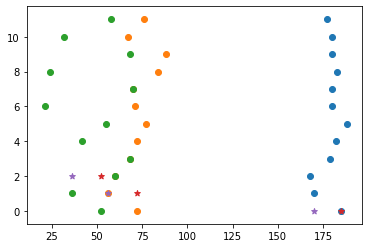

In [61]:
y=np.arange(12)
for name in features_name:
    plt.scatter(data[name],y)
for i in range(len(centers)-1):
    plt.scatter(centers[i],np.arange(len(centers[i])),marker="*")
plt.show()

In [62]:

def get_final_center():
    for i in range(centers_no-1,len(data)):
        to_update_center=[]
        dist_cluster=[]
        center=0  
        try:
            while center !=len(centers):
                center_col=0
                distence=0
                to_update_center.append(data.iloc[i,center])
                while center_col !=len(features_name):
                    distence+=(data.iloc[i,center_col]-centers[center][center_col])**2
        #               print(data.iloc[i,center_col],centers[center][center_col])
                    center_col+=1
#                 print(math.sqrt(distence))
                center+=1
                dist_cluster.append(math.sqrt(distence))
        except:
            continue
        min_index=dist_cluster.index(min(dist_cluster))
#         print(min_index)
        for l in range(len(centers)):
            centers[min_index][l]=(centers[min_index][l]+to_update_center[l])/len(features_name)
    return centers

In [50]:
center=get_final_center()
center

[[95.37037037037037, 41.74074074074074, 18.555555555555557],
 [93.03703703703702, 34.96296296296296, 15.888888888888888],
 [89.81481481481482, 39.18518518518518, 30.962962962962962]]

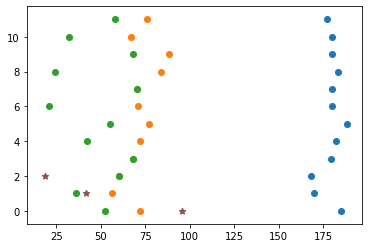

In [51]:
y=np.arange(12)
centerlabel=list(zip(centers[0],centers[1]))
plt.scatter(data['height'],y)
plt.scatter(data['weight'],y)
plt.scatter(data['age'],y)
plt.scatter(centers[0],np.arange(len(centers[0])),marker="*")
plt.scatter(centers[0],np.arange(len(centers[1])),marker="*")
plt.scatter(centers[0],np.arange(len(centers[2])),marker="*")
plt.show()